# Homework 2 Q1

In [114]:
from sklearn import tree, model_selection, metrics, naive_bayes
import numpy as np
import pandas as pd
from scipy import stats
import re

### Task 1: Get Feature Names
- Load the .names file
- Find where it says Attribute Information
- For each line, extract the string after the number and before the colon

In [115]:
fileName = "house-votes-84.names"
lineToFind = "Attribute Information"
pattern = r"(?<=\d\. )[^:]+" # Capture everyghing after a number + period and before a colon
column_names = []
with open(fileName, "rt") as fin:  # We can use a with block to close the file when control leaves the block
    process_lines = False  # Flag to start processing after the line is found
    for line in fin:
        if lineToFind in line:
            process_lines = True  # Start processing from this point
            continue  # Skip the line containing "Attribute Information"
        if process_lines:
            match = re.search(pattern, line)
            if match:
                column_names.append(match.group())
            else:
                break

print(column_names)


['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']


### Task 2: Load data using numpy
- Use numpy to load data (.data)
- Convert 'y' to 1, 'n' to 0, and '?' to -1
- Create three different datasets
    - Leave the dataset with -1 (Normalized)
    - Discard rows that have -1 values (Discarded)
    - Determine what is the most common value in each column and use that to replace the value (Imputed)

In [116]:
orginalData = np.loadtxt("house-votes-84.data", delimiter=",", dtype=str) #skip the first line since it's the header
print(orginalData)

[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' '?']
 ['democrat' '?' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' '?' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' '?' 'n']]


In [117]:
mapping = {
    'democrat': 0,
    'republican': 1,
    'y': 1,
    'n': 0,
}

def normalize_values(row):
    return [mapping.get(value, -1) for value in row]  # Default to -1 if not found

normalizedArray = np.array([normalize_values(row) for row in orginalData])
print(normalizedArray[:4])

[[ 1  0  1  0  1  1  1  0  0  0  1 -1  1  1  1  0  1]
 [ 1  0  1  0  1  1  1  0  0  0  0  0  1  1  1  0 -1]
 [ 0 -1  1  1 -1  1  1  0  0  0  0  1  0  1  1  0  0]
 [ 0  0  1  1  0 -1  1  0  0  0  0  1  0  1  0  0  1]]


In [118]:
discardArray = np.array([row for row in normalizedArray if -1 not in row])
print(discardArray[:4])

[[0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1]
 [0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1]
 [0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1]]


In [119]:
modes = stats.mode(normalizedArray, axis=0)

def impute_values(row):
    return [modes.mode[i] if value == -1 else value for i,value in enumerate(row)]  # Default to -1 if not found

imputeArray = np.array([impute_values(row) for row in normalizedArray])
print(imputeArray[:4])

[[1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1]
 [0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0]
 [0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1]]


### Task 3: Convert data into DataFrame
- Load data as a DataFrame
- Create a Classification DataFrame and a Feature DataFrame

In [120]:
normalizedDf = pd.DataFrame(data=normalizedArray, columns=column_names)
discardedDf = pd.DataFrame(data=discardArray, columns=column_names)
imputeDf = pd.DataFrame(data=imputeArray, columns=column_names)


In [121]:
normalizedDf

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,0,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,1,0,-1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,1,0,0,0,1,1,1,-1,-1,-1,-1,0,1,1,1,0,1


In [122]:
discardedDf

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
228,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
229,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
230,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


In [123]:
imputeDf

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1


In [124]:
xNorm = normalizedDf.drop(["Class Name"], axis=1)
yNorm = normalizedDf["Class Name"]

xDisc = discardedDf.drop(["Class Name"], axis=1)
yDisc = discardedDf["Class Name"]

xImpute = imputeDf.drop(["Class Name"], axis=1)
yImpute = imputeDf["Class Name"]

### Task 4: Cross Fold Validation and Report Statistics
- Create a DecisionTree and NaiveBayes Classifer for each data set (6 total)
- Compute Cross Fold Validation
- Report precision, recall, and F1-scores

### Decision Tree Classifer 

In [125]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [126]:
scores = model_selection.cross_validate(clf, xNorm, yNorm, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 
print("Decision Tree Classifer")
print("Unique Value: Missing Values are -1")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

scores = model_selection.cross_validate(clf, xDisc, yDisc, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 

print("Discard Missing: Remove Values with -1 in Any Row")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

scores = model_selection.cross_validate(clf, xImpute, yImpute, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 

print("Imputed Value: Replace Values with -1 with Mode of the Column")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

Decision Tree Classifer
Unique Value: Missing Values are -1
Mean Precision:  0.9466845918001751
Mean Recall:  0.9425287356321839
Mean F1 Score:  0.9426130458337518
Discard Missing: Remove Values with -1 in Any Row
Mean Precision:  0.9457400451912378
Mean Recall:  0.9438482886216466
Mean F1 Score:  0.9438323988997087
Imputed Value: Replace Values with -1 with Mode of the Column
Mean Precision:  0.9547935495945268
Mean Recall:  0.9540229885057471
Mean F1 Score:  0.9540400867571316


### Naive Bayes Classifer 

In [127]:
clf = naive_bayes.BernoulliNB()

In [128]:
scores = model_selection.cross_validate(clf, xNorm, yNorm, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 

print("Naive Bayes Classifer")
print("Unique Value: Missing Values are -1")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

scores = model_selection.cross_validate(clf, xDisc, yDisc, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 

print("Discard Missing: Remove Values with -1 in Any Row")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

scores = model_selection.cross_validate(clf, xImpute, yImpute, cv=5,
                                    scoring=["precision_weighted", "recall_weighted", "f1_weighted"]) 

print("Imputed Value: Replace Values with -1 with Mode of the Column")
print("Mean Precision: ", np.mean(scores["test_precision_weighted"]))
print("Mean Recall: ", np.mean(scores["test_recall_weighted"]))
print("Mean F1 Score: ", np.mean(scores["test_f1_weighted"]))

Naive Bayes Classifer
Unique Value: Missing Values are -1
Mean Precision:  0.9048733393091
Mean Recall:  0.8965517241379312
Mean F1 Score:  0.8974349284079397
Discard Missing: Remove Values with -1 in Any Row
Mean Precision:  0.91901345771096
Mean Recall:  0.9142460684551341
Mean F1 Score:  0.9141676933484894
Imputed Value: Replace Values with -1 with Mode of the Column
Mean Precision:  0.9108446077619364
Mean Recall:  0.903448275862069
Mean F1 Score:  0.9042537811782646


In [136]:
# Using this for visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(xImpute, yImpute, test_size=1/3.)
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

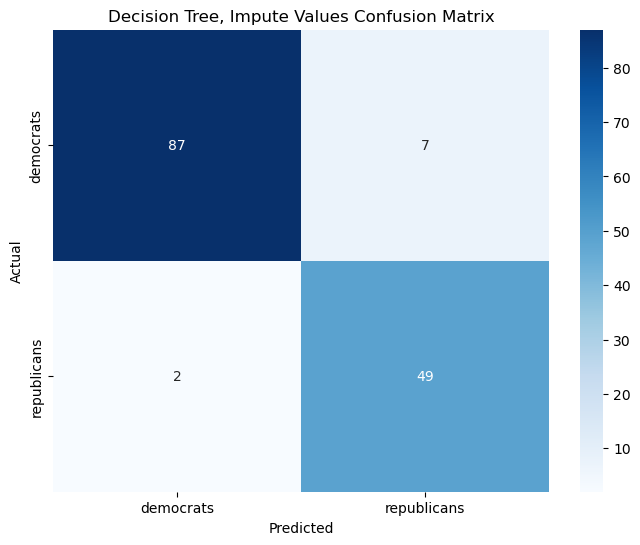

In [138]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["democrats", "republicans"], yticklabels=["democrats", "republicans"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree, Impute Values Confusion Matrix')
plt.show()

In [139]:
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(xDisc, yDisc, test_size=1/3.)
clf = naive_bayes.BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

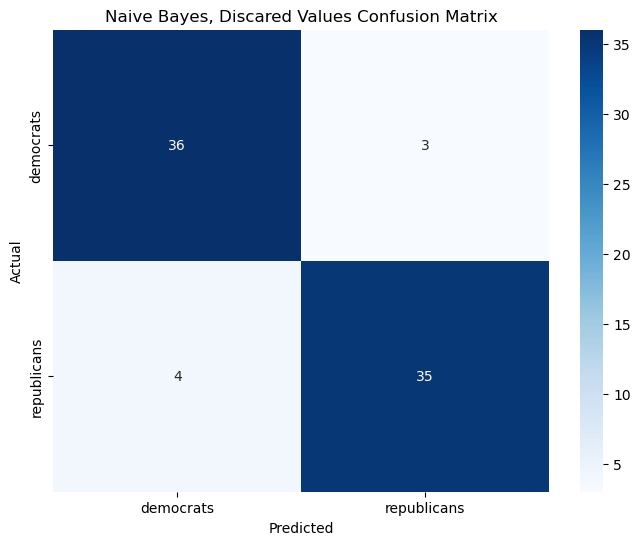

In [140]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["democrats", "republicans"], yticklabels=["democrats", "republicans"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes, Discared Values Confusion Matrix')
plt.show()